### Sales Analysis

#### Import Necessary Liberaries

In [245]:
import pandas as pd

#### Mergining 12 months of sales data into a single file

In [246]:
#reads file in the Sales_Data directory
import os
files = [file for file in os.listdir('Sales_Data')]

In [247]:
#create an empty datafrane
all_month_data = pd.DataFrame()
all_month_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [248]:
#Merge all files into the empty dataframe
for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, df])
    
all_month_data.to_csv('all_data.csv', index = False)

#### Read the updated DataFrame

In [249]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data cleaning

#### Dealing with Nulls

In [250]:
#Check for NaNs in DataFrame
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [251]:
#info() didn't make things clear so we will use isnull().sum()
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

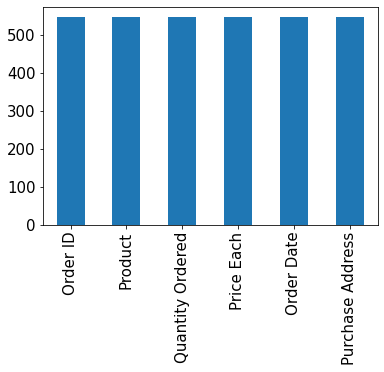

In [252]:
#We can even visualzie the nulls
all_data.isnull().sum().sort_values(ascending = False).plot(kind='bar')

In [253]:
#To see the NaN rows
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
all_data = all_data.dropna(how='all')
#‘any’ : If any NA values are present, drop that row or column.
#‘all’ : If all values are NA, drop that row or column.

In [255]:
#Remove sapaces from column names (You can replace the space with underscore or nothing)
all_data.columns = all_data.columns.str.replace(' ', '_')
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Remove faulty data such as:

In [256]:
all_data[all_data['Order_Date'].str[0:2] == 'Or']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [257]:
all_data = all_data[all_data['Order_Date'].str[0:2] != 'Or']

#### Convert Columns to appropriate Data Types

In [258]:
#Convert Price_Each column to int32

all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered'])
all_data['Price_Each'] = pd.to_numeric(all_data['Price_Each'])

#Convert Order_Date column to datetime

all_data['Order_Date'] = pd.to_datetime(all_data['Order_Date'])

In [259]:
#Final DF
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Augment data with additional columns

#### 1. Add Month, Hour and Minute Column

In [260]:
#Function to convert a column to datetime

all_data['Hour'] = all_data['Order_Date'].dt.hour
all_data['Minute'] = all_data['Order_Date'].dt.minute
all_data['Month'] = all_data['Order_Date'].dt.month

all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Hour,Minute,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,46,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,30,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,27,4


In [261]:
#Sort DF by Month Column
all_data = all_data.sort_values('Month')
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Hour,Minute,Month
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",21,1,1
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",14,22,1
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",19,57,1
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",12,0,1
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",14,37,1


In [262]:
#Convert Month number to Month Name
import calendar
all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])

#### 2. Add a sales Column

In [263]:
#Add a new field
all_data['Sales'] = all_data['Quantity_Ordered'] * all_data['Price_Each']
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Hour,Minute,Month,Sales
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",21,1,Jan,2.99
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",14,22,Jan,150.00
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",19,57,Jan,389.99
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",12,0,Jan,14.95
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",14,37,Jan,300.00


#### 3. Add a CIty Column

In [264]:
Split = all_data.Purchase_Address.str.split(',')
City = Split.str.get(1)
State_Pin = Split.str.get(2)
State = State_Pin.str[1:3]

all_data['City'] = City +', ' + State
#all_data.sort_index(axis = 0)
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Hour,Minute,Month,Sales,City
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",21,1,Jan,2.99,"Boston, MA"
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",14,22,Jan,150.00,"San Francisco, CA"
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",19,57,Jan,389.99,"San Francisco, CA"
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",12,0,Jan,14.95,"Los Angeles, CA"
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",14,37,Jan,300.00,"Atlanta, GA"


In [265]:
#Alternatively we can use a Function

#def get_city(address):
#   return address.split(',')[1]

#def get_state(address):
#    return address.split(',')[2].split(' ')[1]

#all_data['City'] = all_data['Purchase_Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

### Question 1. What was the best month for sales? How much was earned in that month?

In [266]:
#Group by Month and find the sum of all Quantitative Variables
results_1 = all_data.groupby('Month').sum()

#Reset index to get Months a DataFrame column instead of index
results_1.reset_index(inplace=True)
results_1

,Month,Quantity_Ordered,Price_Each,Hour,Minute,Sales
0,Apr,20558,3367671.02,262259,544186,3390670.24
1,Aug,13448,2230345.42,172289,353857,2244467.88
2,Dec,28114,4588415.41,359978,733082,4613443.34
3,Feb,13449,2188884.72,172669,354885,2202022.42
4,Jan,10903,1811768.38,139485,282440,1822256.73
5,Jul,16072,2632539.56,206169,417349,2647775.76
6,Jun,15253,2562025.61,195528,402436,2577802.26
7,Mar,17005,2791207.83,218969,447559,2807100.38
8,May,18667,3135125.13,238780,487899,3152606.75
9,Nov,19798,3180600.68,254865,518231,3199603.20


In [267]:
#Sort by Month Name
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

results_1['Month'] = pd.Categorical(results_1['Month'], categories = months, ordered = True)
results_1.sort_values(by='Month',inplace=True)
results_1

#Alternativly we can make the column Datetime so that we can sort it accordingly.

,Month,Quantity_Ordered,Price_Each,Hour,Minute,Sales
4,Jan,10903,1811768.38,139485,282440,1822256.73
3,Feb,13449,2188884.72,172669,354885,2202022.42
7,Mar,17005,2791207.83,218969,447559,2807100.38
0,Apr,20558,3367671.02,262259,544186,3390670.24
8,May,18667,3135125.13,238780,487899,3152606.75
6,Jun,15253,2562025.61,195528,402436,2577802.26
5,Jul,16072,2632539.56,206169,417349,2647775.76
1,Aug,13448,2230345.42,172289,353857,2244467.88
11,Sep,13109,2084992.09,168513,341698,2097560.13
10,Oct,22703,3715554.83,290650,598437,3736726.88


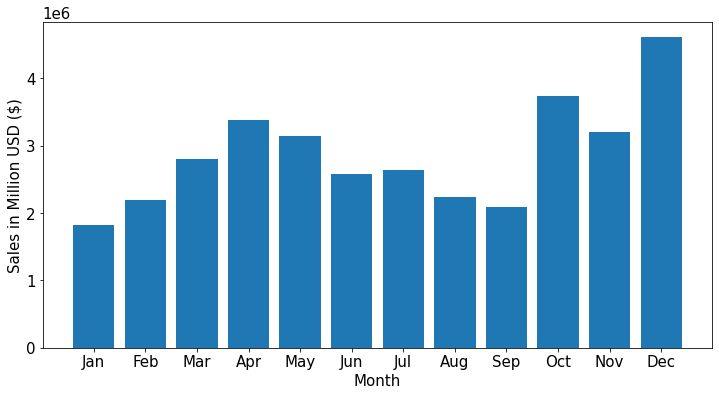

In [268]:
#Vizualize the Data
import matplotlib.pyplot as plt

#Change the Font Size
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.figure(figsize=(12, 6))
plt.bar(results_1['Month'], results_1['Sales'])
plt.ylabel('Sales in Million USD ($)')
plt.xlabel('Month')
plt.show()

In [269]:
# Most Sales were in the month of December.

### Question 2. What city had the highest number of Sales?

In [270]:
#Group by Month and find the sum of all Quantitative Variables
results_2 = all_data.groupby('City').sum()

#Reset index to get Months a DataFrame column instead of index
results_2.reset_index(inplace=True)
results_2

,City,Quantity_Ordered,Price_Each,Hour,Minute,Sales
0,"Atlanta, GA",16602,2779908.20,214264,442932,2795498.58
1,"Austin, TX",11153,1809873.61,141946,289060,1819581.75
2,"Boston, MA",22528,3637409.77,288225,590442,3661642.01
3,"Dallas, TX",16730,2752627.82,214390,435155,2767975.40
4,"Los Angeles, CA",33289,5421435.23,427444,866638,5452570.80
5,"New York City, NY",27932,4635370.83,357696,733598,4664317.43
6,"Portland, ME",2750,447189.25,35211,72856,449758.27
7,"Portland, OR",11303,1860558.22,144421,295533,1870732.34
8,"San Francisco, CA",50239,8211461.74,643265,1319477,8262203.91
9,"Seattle, WA",16553,2733296.01,213292,436368,2747755.48


In [271]:
results_2.sort_values(by='Sales',inplace = True, ascending = False)
results_2

,City,Quantity_Ordered,Price_Each,Hour,Minute,Sales
8,"San Francisco, CA",50239,8211461.74,643265,1319477,8262203.91
4,"Los Angeles, CA",33289,5421435.23,427444,866638,5452570.80
5,"New York City, NY",27932,4635370.83,357696,733598,4664317.43
2,"Boston, MA",22528,3637409.77,288225,590442,3661642.01
0,"Atlanta, GA",16602,2779908.20,214264,442932,2795498.58
3,"Dallas, TX",16730,2752627.82,214390,435155,2767975.40
9,"Seattle, WA",16553,2733296.01,213292,436368,2747755.48
7,"Portland, OR",11303,1860558.22,144421,295533,1870732.34
1,"Austin, TX",11153,1809873.61,141946,289060,1819581.75
6,"Portland, ME",2750,447189.25,35211,72856,449758.27


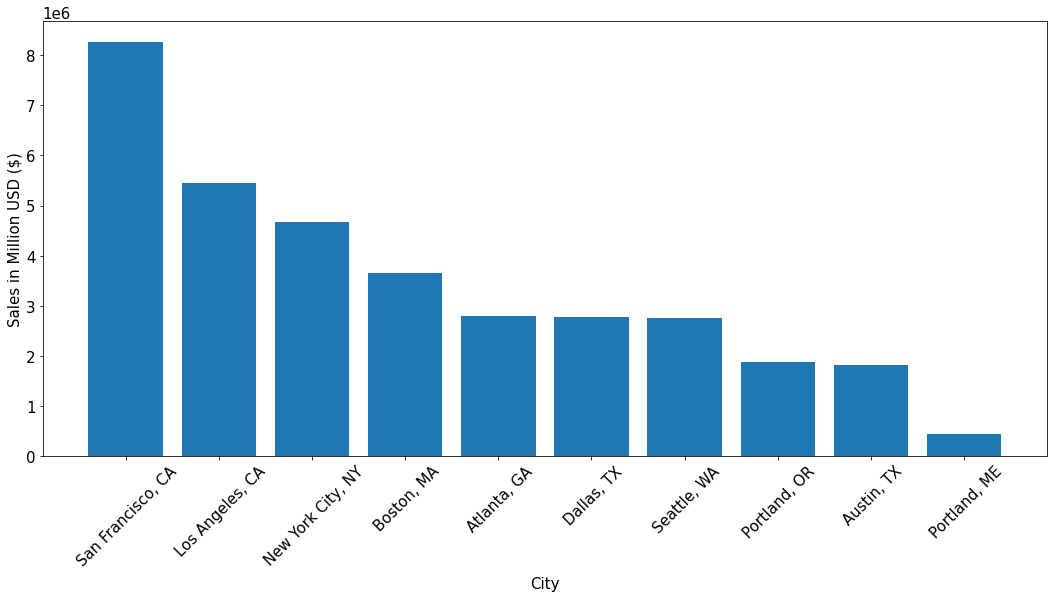

In [272]:
#Vizualize the Data
import matplotlib.pyplot as plt

#Change the Font Size
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.figure(figsize=(18, 8))
plt.bar(results_2['City'], results_2['Sales'])
plt.ylabel('Sales in Million USD ($)')
plt.xlabel('City')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

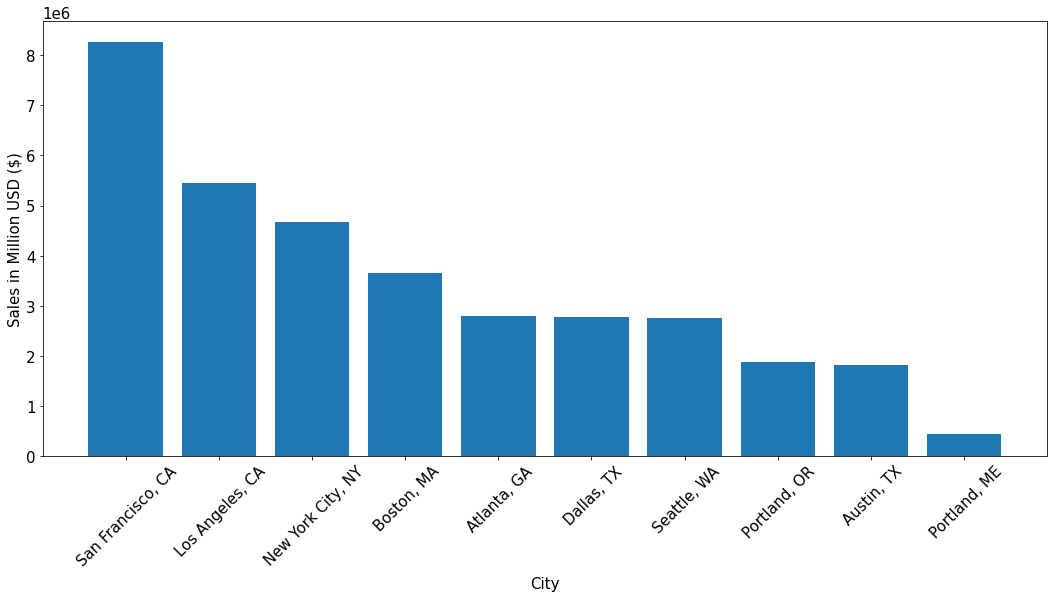

In [273]:
#Vizualize the Data
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.bar(results_2['City'], results_2['Sales'])
plt.ylabel('Sales in Million USD ($)')
plt.xlabel('City')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [274]:
# San Francisco had the most sales.

### Question 3. At what time (Hour) the most sales occur?

In [275]:
hours = [hour for hour, df in all_data.groupby('Hour')]

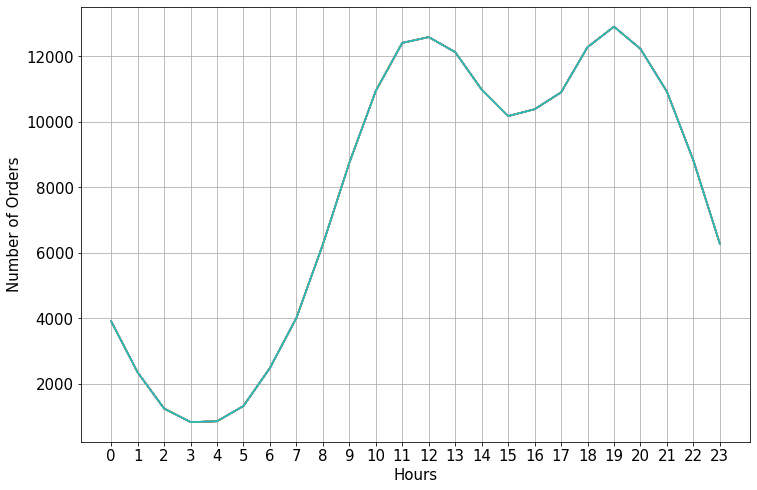

In [276]:
plt.figure(figsize=(12, 8))
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.xlabel('Hours')
plt.grid()

plt.show()

In [277]:
# The most Sales occured at 12 in the noon and 6 in the evening.

### Question 4: What products are most often sold together?

In [278]:
df = all_data[all_data['Order_ID'].duplicated(keep = False)]
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Hour,Minute,Month,Sales,City
70744,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",23,2,Jan,14.95,"San Francisco, CA"
70743,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",23,2,Jan,700.00,"San Francisco, CA"
70813,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",14,33,Jan,700.00,"Los Angeles, CA"
70814,144339,Wired Headphones,1,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",14,33,Jan,11.99,"Los Angeles, CA"
70820,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",22,26,Jan,11.95,"Boston, MA"


In [279]:
df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order_ID', 'Grouped']].drop_duplicates()

#all_data.sort_index(axis = 0)
df2.head()

C:\Users\MD2495~1\AppData\Local\Temp/ipykernel_7284/3109493970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


,Order_ID,Grouped
70744,144271,"Lightning Charging Cable,iPhone"
70813,144339,"iPhone,Wired Headphones"
70820,144344,"USB-C Charging Cable,Google Phone"
70870,144394,"Google Phone,Wired Headphones"
71073,144584,"USB-C Charging Cable,Google Phone"


In [280]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10)    :
    print(key, value)

('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


### Question 5: What product sold the most? Why do you think it sold the most?

In [281]:
product_group = all_data.groupby('Product').sum()
product_group.reset_index(inplace=True)
product_group.head()

,Product,Quantity_Ordered,Price_Each,Hour,Minute,Sales
0,20in Monitor,4129,451068.99,58764,122252,454148.71
1,27in 4K Gaming Monitor,6244,2429637.70,90916,184331,2435097.56
2,27in FHD Monitor,7550,1125974.93,107540,219948,1132424.50
3,34in Ultrawide Monitor,6199,2348718.19,89076,183480,2355558.01
4,AA Batteries (4-pack),27635,79015.68,298342,609039,106118.40


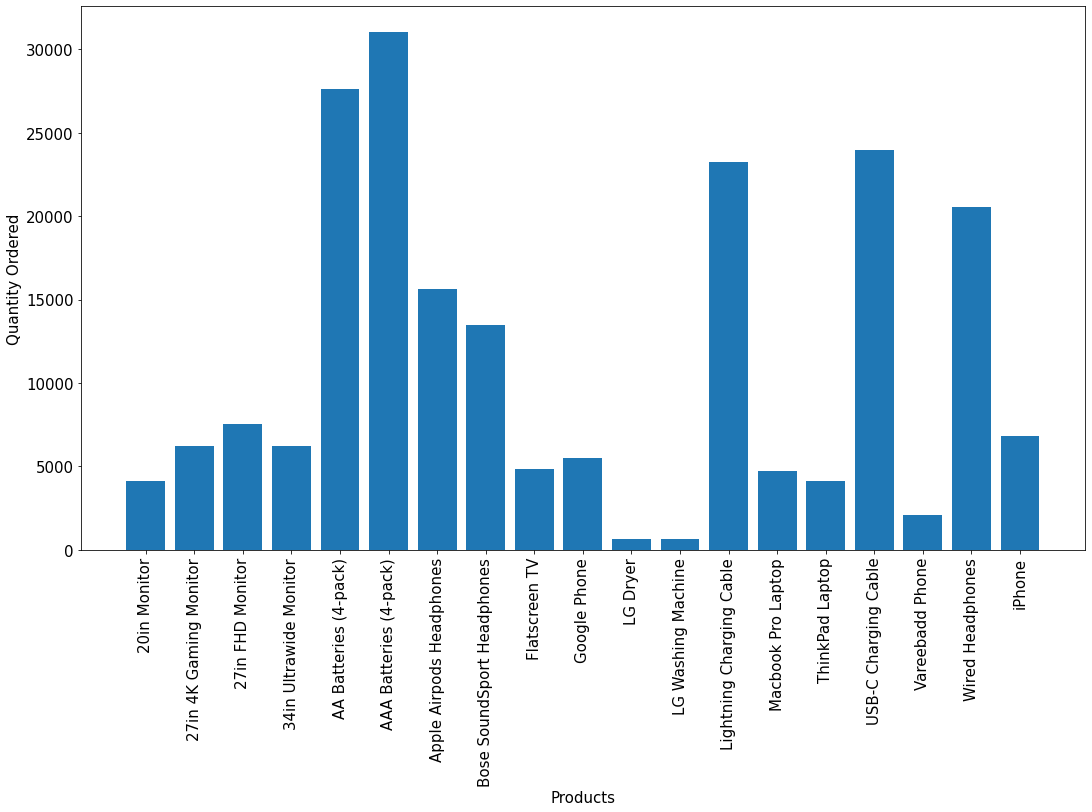

In [282]:
#Vizualize the Data
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plt.bar(product_group['Product'], product_group['Quantity_Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(rotation = 'vertical') # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [283]:
# It appears AAA Batteries Sold the most. It could be because they are the cheaptest product in the store.

C:\Users\MD2495~1\AppData\Local\Temp/ipykernel_7284/3334770842.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_group['Product'], rotation='vertical', size=15)
C:\Users\MD2495~1\AppData\Local\Temp/ipykernel_7284/3334770842.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


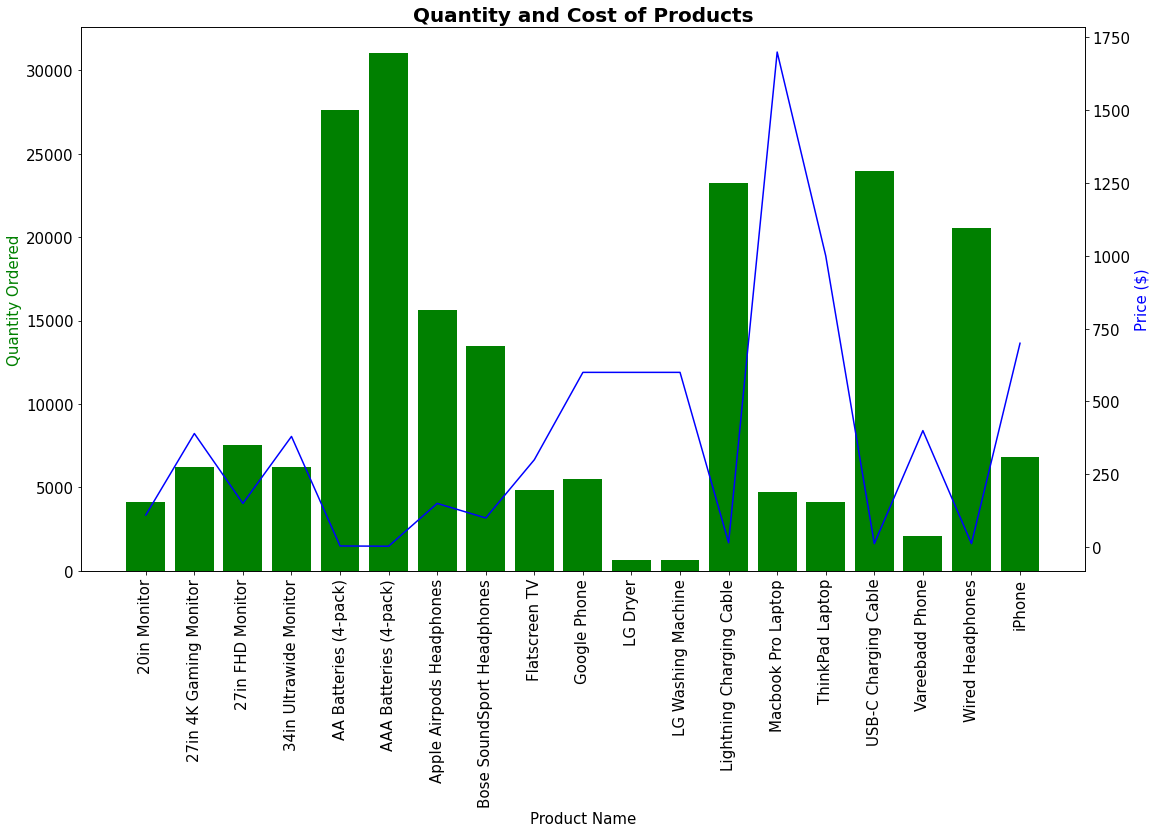

In [284]:
prices = all_data.groupby('Product').mean()['Price_Each']

fig, ax1 = plt.subplots(figsize=(18,10))

ax2 = ax1.twinx()
ax1.bar(product_group['Product'], product_group['Quantity_Ordered'], color='g')
ax2.plot(product_group['Product'], prices, color='b')

ax1.set_title('Quantity and Cost of Products',fontweight="bold", size=20) # Title
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_group['Product'], rotation='vertical', size=15)

fig.show()

In [285]:
# It appears that Macbook Pro Laptop sold moderately well even if the price are high.
# Cheap prodcuts like Batteries and Charging Cables were sold the most because more people are willing 
# to pay that price.